In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})


In [3]:
songs_df = pd.read_csv("/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv", index_col=0)

In [26]:
songs_df.head()
songs_df = songs_df.T

In [35]:
# scaling data
sc = StandardScaler()
sc.fit(songs_df)
df_transformed = sc.transform(songs_df)

In [36]:
# initialize PCA
pca = PCA()
df_pca = pca.fit_transform(df_transformed)

In [37]:
# amount of explained variance
variance_pca = pca.explained_variance_ratio_

(49, 49)

In [39]:
# cumulative explained variance
cumulative_variance = np.cumsum(variance_pca)

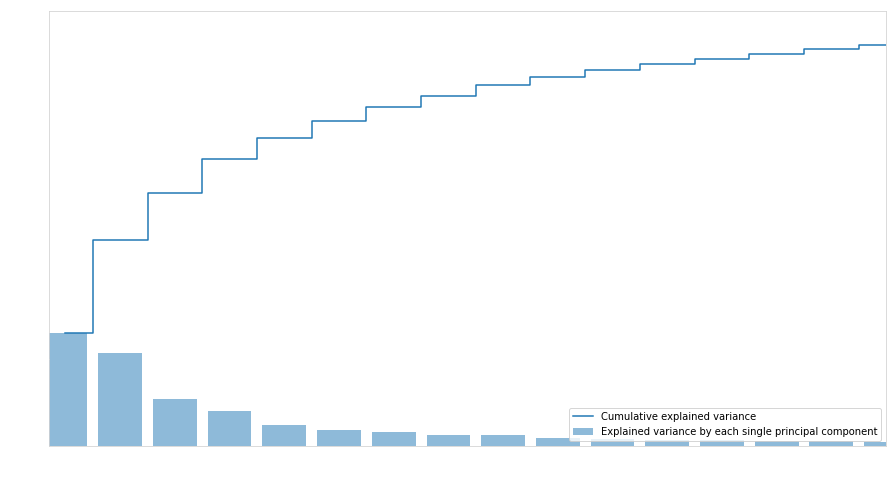

In [40]:
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(range(0, len(variance_pca)), 
        variance_pca, 
        alpha=0.5,
        align='center',
        label='Explained variance by each single principal component'
       
)
plt.step(range(0, len(variance_pca)),
        cumulative_variance,
        where='mid',
        label='Cumulative explained variance')
plt.xlabel('Principal component index', fontsize=15)
plt.ylabel('% of explained variance', fontsize=15)
plt.xlim(-0.3, 15)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()